<a href="https://colab.research.google.com/github/zetaqubit/udlbook/blob/main/Notebooks/Chap07/7_problems_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Problem 7.16 Implement the code in figure 7.8 in PyTorch and plot the training loss as a function of the number of epochs.

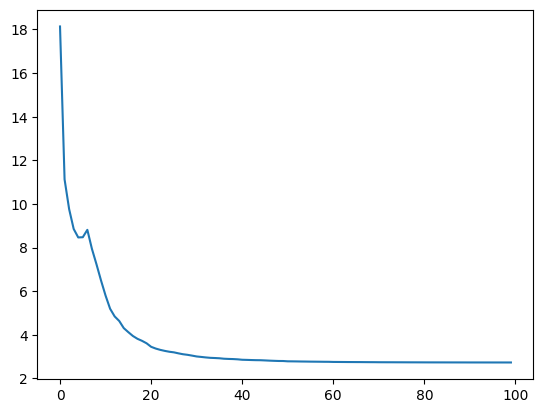

In [5]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 5
# create model with two hidden layers
model = nn.Sequential(
    nn.Linear(D_i, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_o))

# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)
model.apply(weights_init)

# choose least squares loss function
criterion = nn.MSELoss()
# consttruct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y = torch.randn(100, D_o)
data_loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

training_losses = []

# loop over the dataset 100 times
for epoch in range(100):
  epoch_loss = 0.0
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(x_batch)
    loss = criterion(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()
    # update statistics
    epoch_loss += loss.item()

  training_losses.append(epoch_loss)
  # tell scheduler to consider updating learning rate
  scheduler.step()

plt.plot(range(len(training_losses)), training_losses)

Problem 7.17 Change the code in figure 7.8 to tackle a binary classification problem. You will need to (i) change the targets y so they are binary, (ii) change the network to predict numbers between zero and one (iii) change the loss function appropriately.

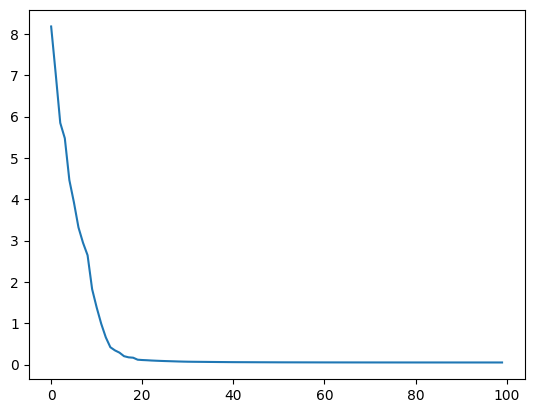

In [20]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 2
# create model with two hidden layers
model = nn.Sequential(
    nn.Linear(D_i, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_o))

# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)
model.apply(weights_init)

# choose least squares loss function
criterion = nn.BCEWithLogitsLoss()
# consttruct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y_idx = torch.randint(0, 2, size=(100,))
y = nn.functional.one_hot(y_idx, num_classes=2).to(torch.float32)
data_loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

training_losses = []

# loop over the dataset 100 times
for epoch in range(100):
  epoch_loss = 0.0
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(x_batch)
    loss = criterion(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()
    # update statistics
    epoch_loss += loss.item()

  training_losses.append(epoch_loss)
  # tell scheduler to consider updating learning rate
  scheduler.step()

plt.plot(range(len(training_losses)), training_losses)